In [1]:
from SubsidieModel import SubsidieModel
from SubsidieModel import AdoptionAgent
from VermogenInkomen import genereer_random_vermogen




17732.448234179607


In [2]:
from SubsidieModel import gemiddelde_leeftijd_auto

model = SubsidieModel()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)
for i in range(13):
    model.step()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)


Hij wordt aangeroepen
Hij is gereset
48.31226364127499
58.27390599675851


In [3]:
cell_0_0 = model.grid.get_cell_list_contents([(0, 0)])

if cell_0_0:
    print("Agent aanwezig op cel (1, 1)")
else:
    print("Geen agent aanwezig op cel (1, 1)")

for agent in model.schedule.agents:
    position = agent.pos
    agent_type = agent.agent_type
    print(f"Agent Type at position ({position[0]} , {position[1]}): {agent_type}")

Agent aanwezig op cel (1, 1)
Agent Type at position (0 , 0): TypeAdopter.LATE_MAJORITY
Agent Type at position (0 , 1): TypeAdopter.EARLY_MAJORITY
Agent Type at position (0 , 2): TypeAdopter.EARLY_MAJORITY
Agent Type at position (0 , 3): TypeAdopter.EARLY_ADOPTER
Agent Type at position (0 , 4): TypeAdopter.EARLY_ADOPTER
Agent Type at position (0 , 5): TypeAdopter.LAGGARDS
Agent Type at position (0 , 6): TypeAdopter.LAGGARDS
Agent Type at position (0 , 7): TypeAdopter.EARLY_ADOPTER
Agent Type at position (0 , 8): TypeAdopter.EARLY_ADOPTER
Agent Type at position (0 , 9): TypeAdopter.LAGGARDS
Agent Type at position (0 , 10): TypeAdopter.EARLY_MAJORITY
Agent Type at position (0 , 11): TypeAdopter.LAGGARDS
Agent Type at position (0 , 12): TypeAdopter.INNOVATOR
Agent Type at position (0 , 13): TypeAdopter.LAGGARDS
Agent Type at position (0 , 14): TypeAdopter.LAGGARDS
Agent Type at position (0 , 15): TypeAdopter.LAGGARDS
Agent Type at position (0 , 16): TypeAdopter.LAGGARDS
Agent Type at posit

In [4]:
from SubsidieModel import TypeAdopter, count_type

a = count_type(model, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model, TypeAdopter.LAGGARDS)
print(e)

# Totaal aantal agents
total = a + b + c + d + e
print(total)

63
338
849
849
401
2500


In [5]:
for i in range(13):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)


    Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                    0.590326                  90                    6   
1                    0.590326                 153                   10   
2                    0.590326                 209                   18   
3                    0.590326                 256                   22   
4                    0.590326                 302                   32   
5                    0.590326                 330                   34   
6                    0.590326                 349                   42   
7                    0.590326                 374                   51   
8                    0.590326                 396                   60   
9                    0.590326                 427                   62   
10                   0.590326                 447                   66   
11                   0.583095                 469                   76   
12                   0.583095         

In [6]:
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data)


                   Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step AgentID                                                                
1    (0, 0)     LATE_MAJORITY        0.497234             37    64818.013595
     (0, 1)    EARLY_MAJORITY        0.635067              1      -12.500000
     (0, 2)    EARLY_MAJORITY        0.635067              1    72688.877918
     (0, 3)     EARLY_ADOPTER        0.835001              1    15653.472319
     (0, 4)     EARLY_ADOPTER        0.835001             71    36119.741894
...                       ...             ...            ...             ...
26   (49, 45)  EARLY_MAJORITY        0.619405             66    73056.522466
     (49, 46)  EARLY_MAJORITY        0.619405             66    19829.221280
     (49, 47)  EARLY_MAJORITY        0.619405             26   120212.500000
     (49, 48)  EARLY_MAJORITY        0.619405             73    59394.623674
     (49, 49)   LATE_MAJORITY        0.484369             59     7483.170496

In [7]:

agent_ID = (10,10)


agent_data_single = agent_data.xs(agent_ID, level="AgentID")

print(agent_data_single)


     Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step                                                          
1      LAGGARDS        0.441434              2          -250.0
2      LAGGARDS        0.441434              3          -312.5
3      LAGGARDS        0.441434              4          -375.0
4      LAGGARDS        0.441434              5          -437.5
5      LAGGARDS        0.441434              6          -500.0
6      LAGGARDS        0.441434              7          -562.5
7      LAGGARDS        0.441434              8          -625.0
8      LAGGARDS        0.441434              9          -687.5
9      LAGGARDS        0.441434             10          -750.0
10     LAGGARDS        0.441434             11          -812.5
11     LAGGARDS        0.441434             12          -875.0
12     LAGGARDS        0.436499             13          -937.5
13     LAGGARDS        0.436499             14         -1000.0
14     LAGGARDS        0.436499             15         

In [8]:
for i in range(216):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)



211
211
212
212
213
213
214
214
215
215
216
216
217
217
218
218
219
219
220
220
221
221
222
222
223
223
224
224
225
225
226
226
227
227
228
228
229
229
230
230
231
231
232
232
233
233
234
234
235
235
236
236
237
237
238
238
239
239
240
240
241
241
242
242
     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                     0.590326                  90                    6   
1                     0.590326                 153                   10   
2                     0.590326                 209                   18   
3                     0.590326                 256                   22   
4                     0.590326                 302                   32   
..                         ...                 ...                  ...   
237                   0.514837                1682                  995   
238                   0.514837                1682                  995   
239                   0.513131                1684                  9

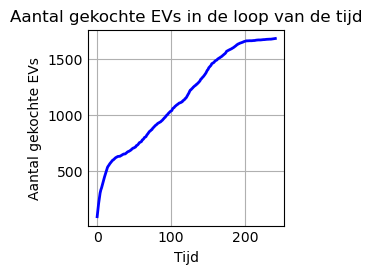

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_evs = model_data['Aantal gekochte EV'].tolist()

y = aantal_gekochte_evs
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_evs))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_evs, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()


In [10]:
import pandas as pd

selected_data = pd.DataFrame()

for i in range(1, 121, 12):  # Start vanaf 1 en stap met 12
    model_data_i = model.datacollector.get_model_vars_dataframe().iloc[[i]]
    selected_data = pd.concat([selected_data, model_data_i])

print(selected_data)


     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
1                     0.590326                 153                   10   
13                    0.583095                 510                   91   
25                    0.576393                 618                  188   
37                    0.570182                 651                  247   
49                    0.564425                 705                  340   
61                    0.559090                 777                  398   
73                    0.554145                 866                  499   
85                    0.549562                 936                  581   
97                    0.545314                1019                  691   
109                   0.541377                1096                  783   

     Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  \
1                                  0.7404                     0.082658   
13                        

In [11]:
import pandas as pd

selected_data = pd.DataFrame()

for i in range(0, 121, 12):  # Start vanaf 1 en stap met 12
    model_data_i = model.datacollector.get_model_vars_dataframe().iloc[[i]]
    selected_data = pd.concat([selected_data, model_data_i])

print(selected_data)

     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                     0.590326                  90                    6   
12                    0.583095                 494                   86   
24                    0.576393                 612                  179   
36                    0.570182                 651                  240   
48                    0.564425                 701                  331   
60                    0.559090                 763                  397   
72                    0.554145                 858                  490   
84                    0.549562                 934                  579   
96                    0.545314                1012                  687   
108                   0.541377                1092                  774   
120                   0.537729                1151                  848   

     Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  \
0                        

In [12]:
from SubsidieModelLinear import SubsidieModel2

model2 = SubsidieModel2()
leeftijd2 = gemiddelde_leeftijd_auto(model2)
print(leeftijd2)
for i in range(13):
    model2.step()

leeftijd2 = gemiddelde_leeftijd_auto(model2)
print(leeftijd2)


Hij wordt aangeroepen
Hij is gereset
48.745222929936304
57.62314225053078


In [13]:
for i in range(229):
    model2.step()
    

model_data2 = model2.datacollector.get_model_vars_dataframe()

print(model_data2)


191
191
192
192
193
193
194
194
195
195
196
196
197
197
198
198
199
199
200
200
201
201
202
202
203
203
204
204
205
205
206
206
207
207
208
208
209
209
210
210
211
211
212
212
213
213
214
214
215
215
216
216
217
217
218
218
219
219
220
220
221
221
222
222
223
223
224
224
225
225
226
226
227
227
228
228
229
229
230
230
231
231
232
232
233
233
234
234
235
235
236
236
237
237
238
238
239
239
240
240
241
241
242
242
     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                     0.501388                  54                   21   
1                     0.501388                 103                   28   
2                     0.501388                 164                   49   
3                     0.501388                 215                   62   
4                     0.501388                 246                   69   
..                         ...                 ...                  ...   
237                   0.591046                1737         

In [14]:
agent_data2 = model2.datacollector.get_agent_vars_dataframe()
print(agent_data2)


                   Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step AgentID                                                                
1    (0, 0)     LATE_MAJORITY          0.4152             41    17921.728323
     (0, 1)          LAGGARDS          0.3808             62     1651.863175
     (0, 2)     EARLY_ADOPTER          0.7280              7     -162.500000
     (0, 3)     LATE_MAJORITY          0.4152             70    85050.000000
     (0, 4)     EARLY_ADOPTER          0.7280              1    20454.425410
...                       ...             ...            ...             ...
242  (49, 45)  EARLY_MAJORITY          0.6360            224   166797.209289
     (49, 46)  EARLY_MAJORITY          0.6360            220   166024.158364
     (49, 47)  EARLY_MAJORITY          0.6360            135    75499.729915
     (49, 48)  EARLY_MAJORITY          0.6360            201   123620.856619
     (49, 49)  EARLY_MAJORITY          0.6360            144    79856.663733

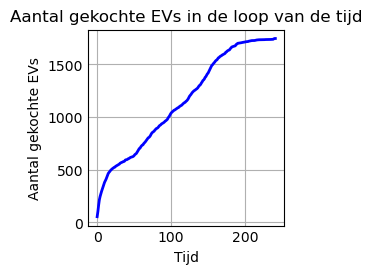

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_ev_2 = model_data2['Aantal gekochte EV'].tolist()

y = aantal_gekochte_ev_2
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_ev_2))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_ev_2, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()


In [16]:
from SubsidieModel3 import SubsidieModel3

model3 = SubsidieModel3()
leeftijd3 = gemiddelde_leeftijd_auto(model3)
print(leeftijd3)
for i in range(13):
    model3.step()

leeftijd3 = gemiddelde_leeftijd_auto(model3)
print(leeftijd3)


Hij wordt aangeroepen
Hij is gereset
48.82491944146079
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
648.4650433328859
648.4650433328859
57.32330827067669


In [17]:
for i in range(229):
    model3.step()
    

model_data3 = model3.datacollector.get_model_vars_dataframe()

print(model_data3)

648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
648.4650433328859
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
841.0138248494432
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1090.7361327491005
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1414.60850717578
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1834.6483338096223
1

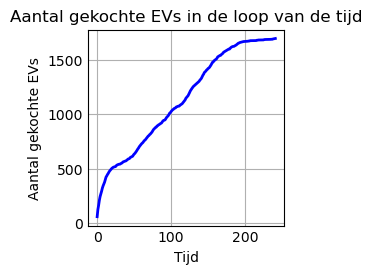

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_ev_3 = model_data3['Aantal gekochte EV'].tolist()

y = aantal_gekochte_ev_3
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_ev_3))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_ev_3, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()


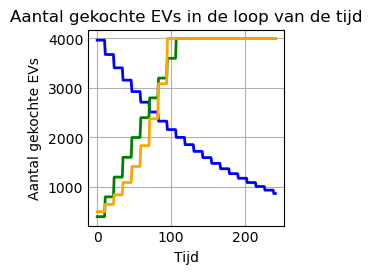

In [19]:
from SubsidieModel import subsidie_log
from SubsidieModelLinear import subsidie_log2
from SubsidieModel3 import subsidie_log3

plt.style.use('_mpl-gallery')
subsidie1 = model_data['Hoeveelheid Subsidie'].tolist()
subsidie2 = model_data2['Hoeveelheid Subsidie'].tolist()
subsidie3 = model_data3['Hoeveelheid Subsidie'].tolist()

y = subsidie1
y2 = subsidie2
y3 = subsidie3
# Maak een array voor de tijd (stappen)
x = np.arange(len(subsidie1))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, subsidie1, linewidth=2.0, color='blue')  # Use x as time steps
ax.plot(x, subsidie2, linewidth=2.0, color='green')  # Use x as time steps
ax.plot(x, subsidie3, linewidth=2.0, color='orange')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()
